##### sklearn.datasets sınıfında "make_classification" fonksiyonunu kullanarak veri kümesi oluşturun. 
- Tek etiket (y) 9 özellik (X) ile 10000 örnek oluşturun. Ayrıca şu parametreleri kullanın:
- n_informative = 4
- class_sep = 2
- random_state = 18

In [1]:
# Gerekli kitaplıkları içe aktarın.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [27]:
# Sklearn'de make_classification fonksiyonunu kullanarak veri kümesi oluşturun.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=9, n_informative=4, class_sep=2, random_state=18)
print("Shape of X: ", X.shape,"\nShape of y: ", y.shape)

Shape of X:  (10000, 9) 
Shape of y:  (10000,)


In [53]:
df = pd.DataFrame(X, columns= ("x1","x2","x3","x4","x5","x6","x7","x8","x9"))
y = pd.DataFrame(y)

In [56]:
# Yinelenen satırları ve eksik verileri kontrol edin.
print("Number of Duplicated Data: ", df.duplicated().sum())
print("\nSum of NA Data:\n", df.isna().sum())

Number of Duplicated Data:  0

Sum of NA Data:
 x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
x9    0
dtype: int64


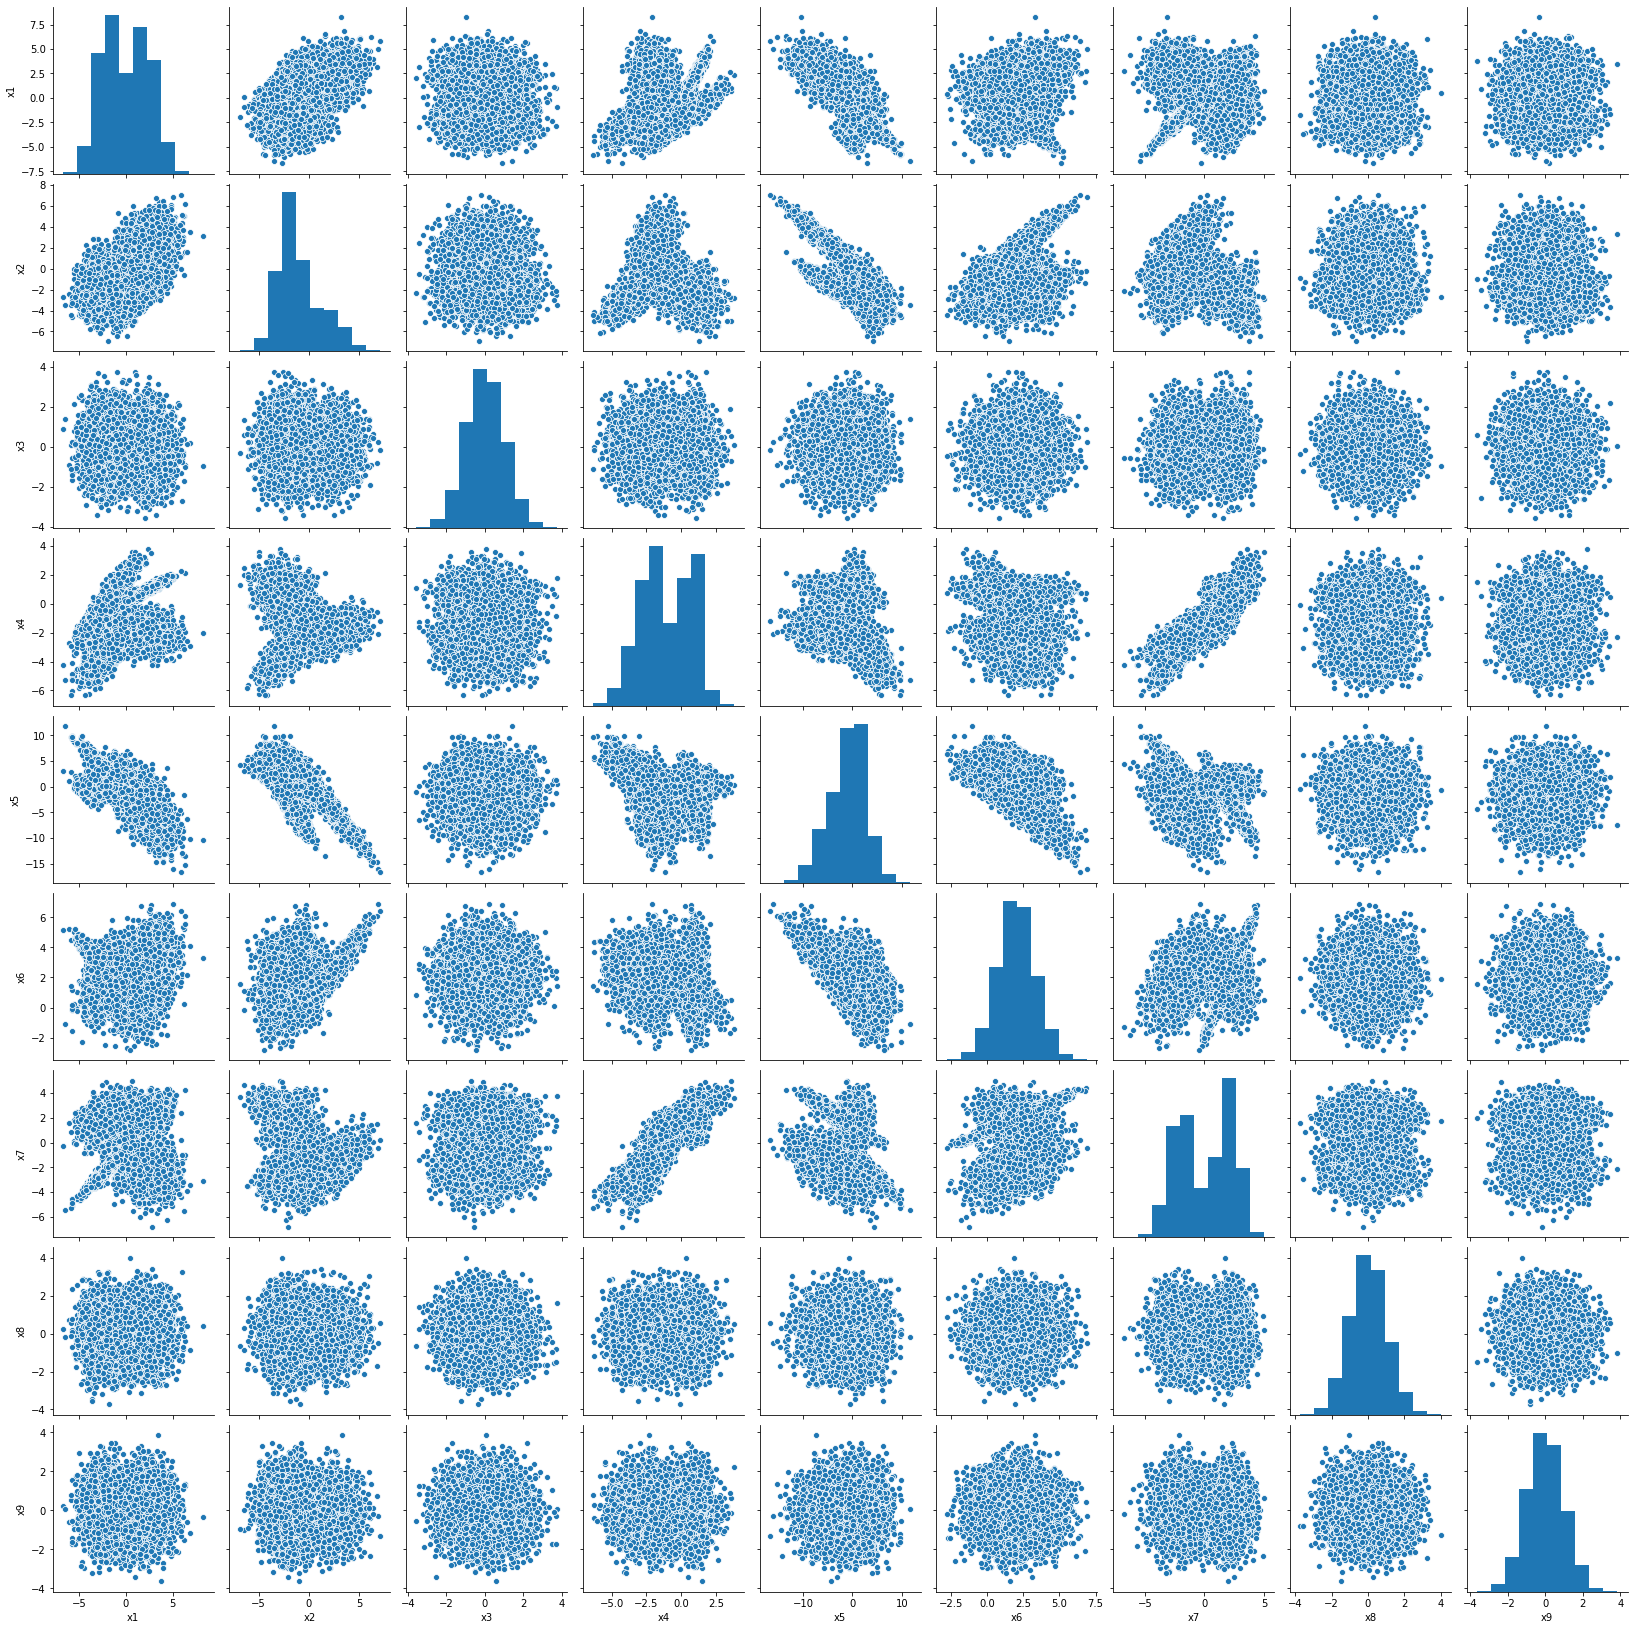

In [38]:
# Her özellik için verileri görselleştirin (pairplot, distplot etc.)
sns.pairplot(df)

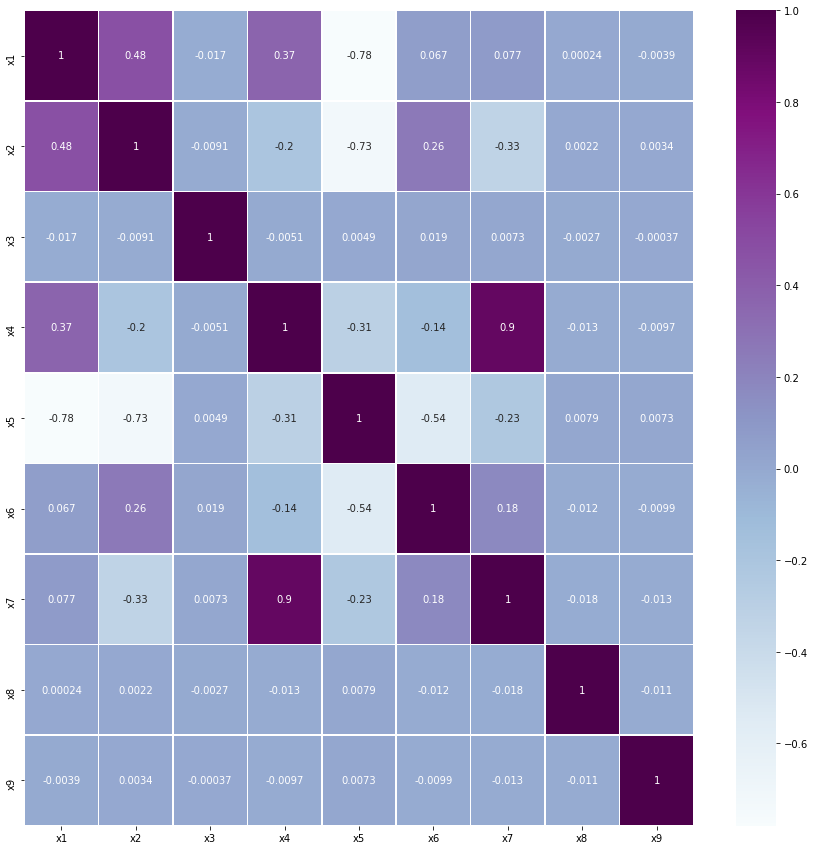

In [79]:
# Korelasyon matrisi çizin.
corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=.5, cmap="BuPu")

In [83]:
#Drop x4 and x5 features because of high correlation
df = df.drop(["x4","x5"] ,axis=1).reset_index(drop= True)
df

,x1,x2,x3,x6,x7,x8,x9
0,3.290489,-0.411827,-0.600695,1.019036,-5.717909,-0.179226,-0.914161
1,-0.543413,-3.782512,0.390637,1.185315,1.218147,0.007708,-0.957374
2,-2.697898,-3.862467,-0.407272,2.080082,1.416647,0.583622,1.332092
3,1.051777,-3.129374,-0.499094,1.997441,1.938695,-0.113648,0.882476
4,2.913780,2.582148,-1.755320,2.062468,-2.614919,-1.154300,0.303457
...,...,...,...,...,...,...,...
9995,2.748612,2.334336,-0.215422,1.608074,-0.916196,-0.322332,2.451602
9996,3.309771,-1.234190,-0.049615,2.779653,2.658484,0.584260,0.241696
9997,5.565853,3.162008,-0.410973,3.057350,-2.399711,-0.140276,0.717553
9998,-3.312244,-2.726791,-1.637191,3.053202,1.490092,0.837437,1.491268


In [89]:
# Aykırı değerleri işleyin (IsolationForest, Z-score, IQR kullanabilirsiniz)
from scipy import stats
z = np.abs(stats.zscore(df))
print("length of anomaly list: ", len(np.where(z>3)[0]))
print("Index of Anomaly data:", np.where(z>3)[0])

outliers = list(set(np.where(z>3)[0]))
new_df = df.drop(outliers, axis=0).reset_index(drop= False)

new_y = y.drop(index=outliers, axis=0)

length of anomaly list:  135
Index of Anomaly data: [ 230  301  339  444  717  774  804  829  908  949 1029 1082 1206 1265
 1300 1300 1420 1456 1510 1857 1894 2234 2326 2357 2418 2418 2426 2501
 2541 2735 2776 2872 3053 3066 3128 3173 3221 3338 3420 3460 3468 3468
 3573 3633 3655 3683 3696 3723 3871 3897 4168 4293 4468 4621 4621 4631
 4831 4877 4877 4888 4888 4907 4918 5005 5112 5244 5293 5296 5494 5506
 5663 5678 5717 5719 5747 5747 5895 6062 6067 6136 6268 6268 6272 6479
 6489 6490 6534 6682 6692 6798 6882 6914 6997 6998 7223 7330 7357 7395
 7467 7542 7542 7546 7561 7689 7832 7905 7908 8092 8113 8222 8266 8458
 8619 8640 8671 8720 8738 8805 8844 8866 8968 8982 9109 9223 9318 9338
 9411 9443 9463 9571 9604 9710 9755 9790 9919]


9874

In [93]:
new_df = new_df.drop(["index"] ,axis=1).reset_index(drop= True)
new_df

,x1,x2,x3,x6,x7,x8,x9
0,3.290489,-0.411827,-0.600695,1.019036,-5.717909,-0.179226,-0.914161
1,-0.543413,-3.782512,0.390637,1.185315,1.218147,0.007708,-0.957374
2,-2.697898,-3.862467,-0.407272,2.080082,1.416647,0.583622,1.332092
3,1.051777,-3.129374,-0.499094,1.997441,1.938695,-0.113648,0.882476
4,2.913780,2.582148,-1.755320,2.062468,-2.614919,-1.154300,0.303457
...,...,...,...,...,...,...,...
9869,2.748612,2.334336,-0.215422,1.608074,-0.916196,-0.322332,2.451602
9870,3.309771,-1.234190,-0.049615,2.779653,2.658484,0.584260,0.241696
9871,5.565853,3.162008,-0.410973,3.057350,-2.399711,-0.140276,0.717553
9872,-3.312244,-2.726791,-1.637191,3.053202,1.490092,0.837437,1.491268


In [108]:
# Veri kümesini eğitim ve test verisetlerine ayırın.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, new_y, test_size=0.3, random_state=42)

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [140]:
# Karar Ağacını içe aktarın, farklı hiperparametreleri deneyerek algoritmayı ayarlayın. (hyperpara)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth= 2, random_state= 22)
clf.fit(X_train, y_train)
print("Accuracy of train: ", clf.score(X_train, y_train))
print("Accuracy of test: ", clf.score(X_test, y_test))

Accuracy of train:  0.9425553465489799
Accuracy of test:  0.9409382382720216


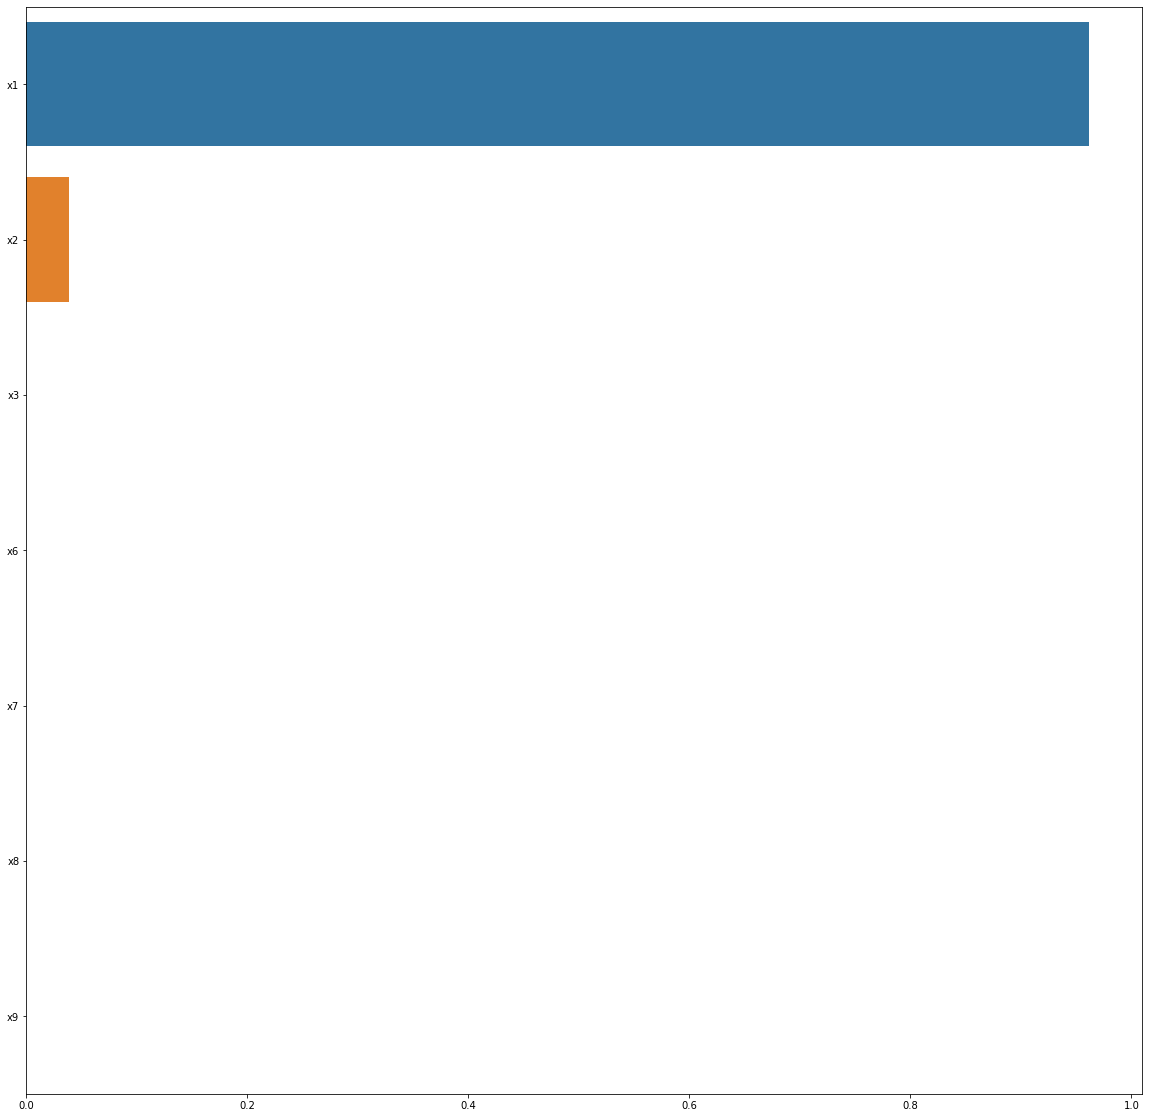

In [145]:
# Öznitelik önemlerini (feature importances) görselleştirin.
plt.figure(figsize=(20,20))
importances = clf.feature_importances_
sns.barplot(x= importances, y= X_test.columns)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1467
           1       0.95      0.93      0.94      1496

    accuracy                           0.94      2963
   macro avg       0.94      0.94      0.94      2963
weighted avg       0.94      0.94      0.94      2963

**************************************************************************************************** 

Precision = 0.940995073658196
Recall = 0.9410151679188128
Accuracy = 0.9409382382720216
F1 Score = 0.9409381306344555

**************************************************************************************************** 

**************************************************************************************************** 



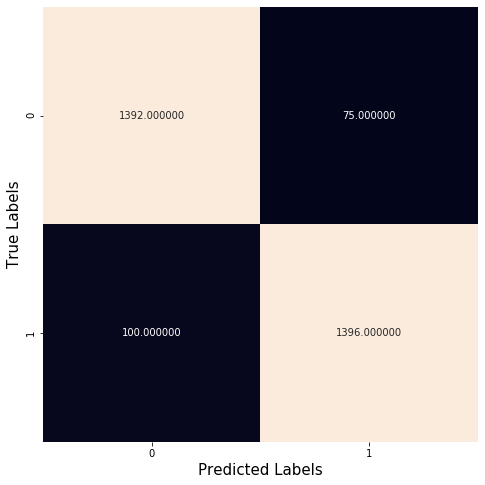

In [159]:
# Hata matrisini oluşturun ve accuracy, recall, precision ve f1-score değerlerini hesaplayın.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
print("*"*100,"\n")

# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}\n".format(f1_score(y_test, pred,average='macro')))
print("*"*100,"\n")
print("*"*100,"\n")

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm,fmt="f", square=True, annot=True, cbar=False)
#ax.xaxis.set_ticklabels(categories, fontsize = 12)
#ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [178]:
!pip install xgboost
import xgboost as xgb

In [ ]:
# XGBoostClassifier'ı içe aktarın, farklı hiperparametreleri deneyerek algoritmayı ayarlayın.

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dict = {
    'max_depth':range(2,10,2),
    'min_child_weight':range(2,6),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000],
    'num_class': range(1,5)
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc, param_dict, cv=4, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

In [ ]:
# Öznitelik önemlerini (feature importances) görselleştirin.
plt.figure(figsize=(20,20))
importances2 = xgc.feature_importances_
sns.barplot(x= importances2, y= new_df.columns)
plt.show()

In [ ]:
# Hata matrisini oluşturun ve accuracy, recall, precision ve f1-score değerlerini hesaplayın.
pred = xgc.predict(X_test)
print(classification_report(y_test,pred))
print("*"*100,"\n")

# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}\n".format(f1_score(y_test, pred,average='macro')))
print("*"*100,"\n")
print("*"*100,"\n")

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, fmt="f", square=True, annot=True, cbar=False)
#ax.xaxis.set_ticklabels(categories, fontsize = 12)
#ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()